In [132]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

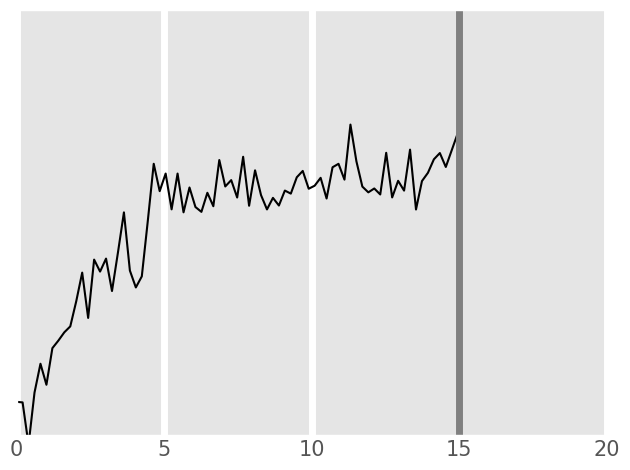

In [143]:
np.random.seed(10)

x = np.linspace(-10, 10, num=100)
jitter = np.random.normal(scale=100, size=x.shape)

cutoff = 5
cutoff_idx = np.argwhere(np.abs(x - cutoff) < 1e-1)[0, 0]
x[cutoff_idx-1] = 5


y = (x ** 3) + jitter

plt.plot(x[:cutoff_idx] + 10, y[:cutoff_idx], color="black")
plt.xticks([0, 5, 10, 15, 20], fontsize=15)
plt.yticks([])
plt.axvline(15, color="grey", lw=5)
plt.ylim(-1000, 700)
plt.xlim(0, 20)

plt.grid(True, which='both', linewidth=5, color='white')

plt.tight_layout()
plt.savefig("notebook_plots/fc_task.png", dpi=300, bbox_inches='tight')
plt.show()